In [25]:
import re

rawdata = {}

f = open('data.csv', 'r')
header = f.readline().strip().split(',')
for line in f:
    items = line.strip().split(',')

    date = re.match('(\d\d\d\d)(\d\d)(\d\d)', items[header.index('DATE')])
    year = int(date.group(1))
    month = int(date.group(2))
    day = int(date.group(3))

    city = items[header.index('CITY')]
    temperature = float(items[header.index('TEMP')])
    if city not in rawdata:
        rawdata[city] = {}
    if year not in rawdata[city]:
        rawdata[city][year] = {}
    if month not in rawdata[city][year]:
        rawdata[city][year][month] = {}
    rawdata[city][year][month][day] = temperature
f.close()

In [33]:
import numpy as np
import pylab

In [80]:
year = 1961
city = 'SEATTLE'

temperatures = []
assert city in rawdata, "provided city is not available"
assert year in rawdata[city], "provided year is not available"
for month in range(1, 13):
    for day in range(1, 32):
        if day in rawdata[city][year][month]:
            temperatures.append(rawdata[city][year][month][day])
#np.array(temperatures)

In [81]:
def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

In [82]:
def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
        
    """
    
    numerator = 0
    denominator = 0
    mn = sum(y)/len(y)

    for i in range(len(y)):
        numerator = numerator + ((estimated[i] - y[i]) ** 2)
        denominator = denominator + ((y[i] - mn) ** 2)
    
    return round(1 - numerator / denominator,4)

In [83]:
#model = np.array([ 3.02503294e-02, -6.22341809e+01])
degrees = [1,2,4,8]
temperature = [-4.45, -5.85, 6.65, 0.85, -0.55, -1.95, 0.0, -12.2, -3.65, -6.95, -3.05, 8.35, -4.45, -5.55, 3.9, -7.75, 1.35, -8.9, -3.6, -3.65, -8.35, -10.8, 3.3, -1.1, -8.35, 3.35, 2.25, -5.55, -1.95, 4.75, -3.9, 1.95, -7.5, -8.9, -4.7, -3.65, 3.65, 3.9, -3.9, 8.6, -6.95, 6.65, 0.0, -14.7, 2.2]
years = [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]

In [84]:
models = genFits(years, temperature, degrees)

/var/folders/k0/5mz4jdsj64n5f2jltclyq9zh0000gn/T/ipykernel_54634/476497979.py:1: RankWarning: Polyfit may be poorly conditioned
  models = genFits(years, temperature, degrees)


In [85]:
def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = r_squared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

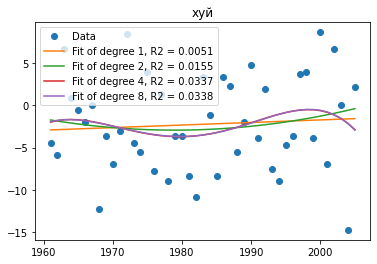

In [86]:
testFits(models, degrees , years, temperature, 'хуй')

In [88]:
INTERVAL_1 = list(range(1961, 2006))
INTERVAL_1

[1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005]